# 4.1 DP_Numberical_Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 无人机高度初始化和速度初始化
h_init = 0.
v_init = 0.

# 无人机终点高度和速度
h_final = 10.
v_final = 0.

# 边界条件定义
h_min = 0.     # 高度下限
h_max = 10.    # 高度上限
N_h = 100     # 高度离散度
v_min = 0.     # 速度下限
v_max = 3.     # 速度上限
N_v = 500     # 速度离散度

In [3]:
# 创建离散向量
Hd = np.linspace(h_min, h_max, N_h + 1)
Vd = np.linspace(v_min, v_max, N_v + 1)

In [4]:
# 无人机加速度上下限设置
u_min = -3.
u_max = 2.

In [5]:
# 定义初始剩余代价矩阵
J_costTogo = np.zeros((N_h + 1, N_v + 1))
# 定义系统输入矩阵
Input_acc = np.zeros((N_h + 1, N_v + 1))

In [6]:
# 计算最后一级的情况
v_avg = 0.5 * (v_final + Vd)
T_delta = (h_max - h_min)/(N_h * v_avg)
acc = (v_final - Vd) / T_delta
J_temp = T_delta
acc_overLimit_indices = np.where(np.logical_or(acc < u_min, acc > u_max))
J_temp[acc_overLimit_indices] = np.inf
J_costTogo[1, :] = J_temp
Input_acc[1, :] = acc

/var/folders/2_/xmwdhxp937b_nc0v_sv_r85w0000gn/T/ipykernel_73655/4177569949.py:3: RuntimeWarning: divide by zero encountered in divide
  T_delta = (h_max - h_min)/(N_h * v_avg)


In [7]:
# 倒数第二级至第二级的情况
Vd_x, Vd_y = np.meshgrid(Vd, Vd)
v_avg = 0.5 * (Vd_x + Vd_y)
T_delta = (h_max - h_min) / (N_h * v_avg)
acc = (Vd_y - Vd_x) / T_delta
J_temp = T_delta
acc_overLimit_indices = np.where(np.logical_or(acc < u_min, acc > u_max))
J_temp[acc_overLimit_indices] = np.inf
J_temp, acc

/var/folders/2_/xmwdhxp937b_nc0v_sv_r85w0000gn/T/ipykernel_73655/3549893650.py:4: RuntimeWarning: divide by zero encountered in divide
  T_delta = (h_max - h_min) / (N_h * v_avg)


(array([[           inf, 3.33333333e+01, 1.66666667e+01, ...,
                    inf,            inf,            inf],
        [3.33333333e+01, 1.66666667e+01, 1.11111111e+01, ...,
                    inf,            inf,            inf],
        [1.66666667e+01, 1.11111111e+01, 8.33333333e+00, ...,
                    inf,            inf,            inf],
        ...,
        [           inf,            inf,            inf, ...,
         3.34672021e-02, 3.34336342e-02, 3.34001336e-02],
        [           inf,            inf,            inf, ...,
         3.34336342e-02, 3.34001336e-02, 3.33667000e-02],
        [           inf,            inf,            inf, ...,
         3.34001336e-02, 3.33667000e-02, 3.33333333e-02]]),
 array([[ 0.000000e+00, -1.800000e-04, -7.200000e-04, ..., -4.464072e+01,
         -4.482018e+01, -4.500000e+01],
        [ 1.800000e-04,  0.000000e+00, -5.400000e-04, ..., -4.464054e+01,
         -4.482000e+01, -4.499982e+01],
        [ 7.200000e-04,  5.400000e-04

In [8]:
for k in range(2, N_h):
    J_temp = T_delta + np.tile(J_costTogo[k-1, :], (N_v+1, 1)).T
    J_costTogo[k, :], l = np.min(J_temp, axis=0), np.argmin(J_temp, axis=0)
    Input_acc[k, :] = acc[l, range(len(l))]

In [9]:
# 第二级至第一级的情况
v_arg = 0.5 * (Vd + v_init)
T_delta = (h_max - h_min) / (N_h * v_arg)
acc = (Vd - v_init) / T_delta
J_temp = T_delta
acc_overLimit_indices = np.where((acc < u_min) | (acc > u_max))
J_temp[acc_overLimit_indices] = np.inf
J_temp = J_temp + J_costTogo[N_h-1, :]
J_costTogo[N_h, 0], l = np.min(J_temp), np.argmin(J_temp)
Input_acc[N_h, 0] = acc[l]

/var/folders/2_/xmwdhxp937b_nc0v_sv_r85w0000gn/T/ipykernel_73655/1978090287.py:3: RuntimeWarning: divide by zero encountered in divide
  T_delta = (h_max - h_min) / (N_h * v_arg)


In [10]:
J_costTogo, Input_acc

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [        inf, 33.33333333, 16.66666667, ...,         inf,
                 inf,         inf],
        [ 0.63492063,  0.63192573,  0.6289868 , ...,         inf,
                 inf,         inf],
        ...,
        [ 4.53485937,  4.53186446,  4.52892553, ...,  3.77138291,
          3.77134947,  3.77131611],
        [ 4.56819271,  4.5651978 ,  4.56225887, ...,  3.80471624,
          3.80468281,  3.80464944],
        [ 4.60152604,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
          0.000000e+00,  0.000000e+00],
        [ 0.000000e+00, -1.800000e-04, -7.200000e-04, ..., -4.464072e+01,
         -4.482018e+01, -4.500000e+01],
        [ 1.984500e+00,  1.984320e+00,  1.983780e+00, ..., -4.464072e+01,
         -4.482018e+01, -4.500000e+01],
        ...,
        [ 1.984500

Text(0, 0.5, 'h(m)')

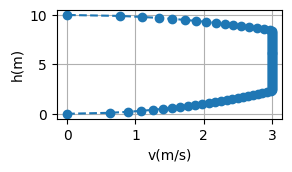

In [11]:
# 结果（画图）
# 初始化参数
h_plot = np.zeros(N_h + 1)
v_plot = np.zeros(N_h + 1)
t_plot = np.zeros(N_h + 1)
acc_plot = np.zeros(N_h + 1)

# 初始条件
h_plot[0] = h_init
v_plot[0] = v_init
t_plot[0] = 0

# 查表确定最优路线
for k in range(N_h):
    h_plot_index = np.argmin(np.abs(h_plot[k] - Hd))
    v_plot_index = np.argmin(np.abs(v_plot[k] - Vd))
    acc_index = np.ravel_multi_index(((N_h + 1) - h_plot_index - 1, v_plot_index), Input_acc.shape)
    acc_plot[k] = Input_acc.flat[acc_index]
    v_2 = 2 * (h_max - h_min) / N_h * acc_plot[k] + v_plot[k]**2
    if 0 > v_2 > -1e-10:  # 浮点运算的误差可能导致sqrt失败
        v_plot[k + 1] = 0
    else:
        v_plot[k + 1] = np.sqrt(v_2)
    h_plot[k + 1] = h_plot[k] + (h_max - h_min) / N_h
    t_plot[k + 1] = t_plot[k] + 2 * (h_plot[k + 1] - h_plot[k]) / (v_plot[k + 1] + v_plot[k])

# 绘制视图
plt.subplot(3, 2, 1)
plt.plot(v_plot, h_plot, '--o')
plt.grid(True)
plt.xlabel('v(m/s)')
plt.ylabel('h(m)')

# 4.2 F1_LQR_Gain

In [12]:
def F1_LQR_Gain(A, B, Q, R, S):
    """
    计算LQR问题的反馈增益矩阵F。

    输入：
    :param A: 系统矩阵A
    :param B: 控制输入矩阵B
    :param Q: 状态权重矩阵Q
    :param R: 控制输入权重矩阵R
    :param S: 系统终值代价权重矩阵S

    输出：
    :return: 反馈增益矩阵F
    """
    # 计算系统矩阵维度，n
    n = A.shape[0]
    # 系统终值代价权重矩阵，定义为P0
    P0 = S
    # 定义最大迭代次数，用于限制程序运行时间
    max_iter = 200
    # 初始化矩阵P为0矩阵，后续用于存放计算得到的一系列矩阵P[k]
    P = np.zeros((n, n * max_iter))
    # 初始化矩阵P的第一个位置为P0
    P[:, 0:n] = P0
    # 定义P[k-1]的初值为P0，即当k=1时，参考式（4.4.23）与（4.4.24）
    P_k_min_1 = P0
    # 定义系统稳态误差阈值，用于判断系统是否到达稳态
    tol = 1e-3
    # 初始化系统误差为无穷
    diff = np.inf
    # 初始化系统反馈增益为无穷
    F_N_min_k = np.inf
    # 初始化系统迭代步
    k = 1

    while diff > tol:
        F_N_min_k_pre = F_N_min_k
        F_N_min_k = np.linalg.inv(R + B.T @ P_k_min_1 @ B) @ B.T @ P_k_min_1 @ A
        P_k = (A - B @ F_N_min_k).T @ P_k_min_1 @ (A - B @ F_N_min_k) + (F_N_min_k).T @ R @ F_N_min_k + Q
        P[:, n * (k - 1):n * k] = P_k
        P_k_min_1 = P_k
        diff = np.max(np.abs(F_N_min_k - F_N_min_k_pre))
        k += 1
        if k > max_iter:
            raise ValueError('Maximum Number of Iterations Exceeded')
            
    # 输出系统迭代步
    print(f'No. of Iteration is {k}')
    # 模块输出：系统增益F
    F = F_N_min_k
    return F

# 4.3 LQR_Test_1D

In [13]:
# 系统定义
A = np.array([[1.]])
n = A.shape[0]  # Dimension of the system matrix A
B = np.array([[1.]])
p = B.shape[1]  # Dimension of the input matrix B

# 权重设计
Q = np.array([[1.]])
S = np.array([[1.]])
R = np.array([[1.]])

# 系统初始化
x0 = 1.  # Initial state
x = x0
x = np.array([x])

In [14]:
# 计算系统负反馈增益
F = F1_LQR_Gain(A, B, Q, R, S)
F

No. of Iteration is 6


array([[0.61797753]])

In [15]:
# 仿真
k_steps = 20
x_history = np.zeros((n, k_steps + 1))
x_history[:, 0] = x
u_history = np.zeros((p, k_steps))

N = k_steps  # Control interval

for k in range(k_steps):
    u = -F @ x
    x = A @ x + B @ u
    x_history[:, k+1] = x
    u_history[:, k] = u


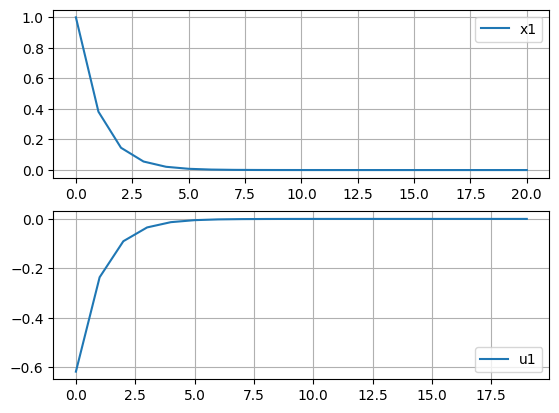

In [16]:
plt.subplot(2, 1, 1)
plt.plot(x_history[0, :])
plt.legend(["x1"])
plt.grid(True)

# System input vs. number of steps
plt.subplot(2, 1, 2)
plt.plot(u_history[0, :])
plt.legend(["u1"])
plt.grid(True)

plt.show()

# 4.4 LQR_Inverted_Pendulum

In [17]:
# 定义系统参数
g = 10.  # 重力加速度
d = 1.   # 平衡车连杆长度

# 系统定义
A = np.array([[0., 1.],
              [g/d, 0]])
B = np.array([[0.], 
              [1.]])
C = np.array([1., 0.])
D = np.array([0.])

# 权重设计
q1 = np.array([[100., 0.], 
               [0., 1.]])
q2 = np.array([[1., 0.], 
               [0., 100.]])
q3 = np.array([[1., 0.], 
               [0., 1.]])
r1 = r2 = r3 = np.array([[1.]])

In [18]:
# 初始化状态
x0 = np.array([np.pi / 20, 0.])

In [19]:
from scipy.linalg import solve_continuous_are
from scipy.signal import StateSpace, lsim

# Solve the Algebraic Riccati Equation (ARE) for different scenarios
P1 = solve_continuous_are(A, B, q1, r1)
K1 = np.linalg.inv(r1) * B.T @ P1

P2 = solve_continuous_are(A, B, q2, r2)
K2 = np.linalg.inv(r2) * B.T @ P2

P3 = solve_continuous_are(A, B, q3, r3)
K3 = np.linalg.inv(r3) * B.T @ P3

# Closed-loop systems
sys_cl1 = StateSpace(A - B @ K1, [[0], [0]], C, D)
sys_cl2 = StateSpace(A - B @ K2, [[0], [0]], C, D)
sys_cl3 = StateSpace(A - B @ K3, [[0], [0]], C, D)

In [20]:
# Simulation
t_span = 0.01
t = np.arange(0, 5 + t_span, t_span)

# Initial response of closed-loop systems
_, y1, x1 = lsim(sys_cl1, U=np.zeros(len(t)), T=t, X0=x0)
_, y2, x2 = lsim(sys_cl2, U=np.zeros(len(t)), T=t, X0=x0)
_, y3, x3 = lsim(sys_cl3, U=np.zeros(len(t)), T=t, X0=x0)

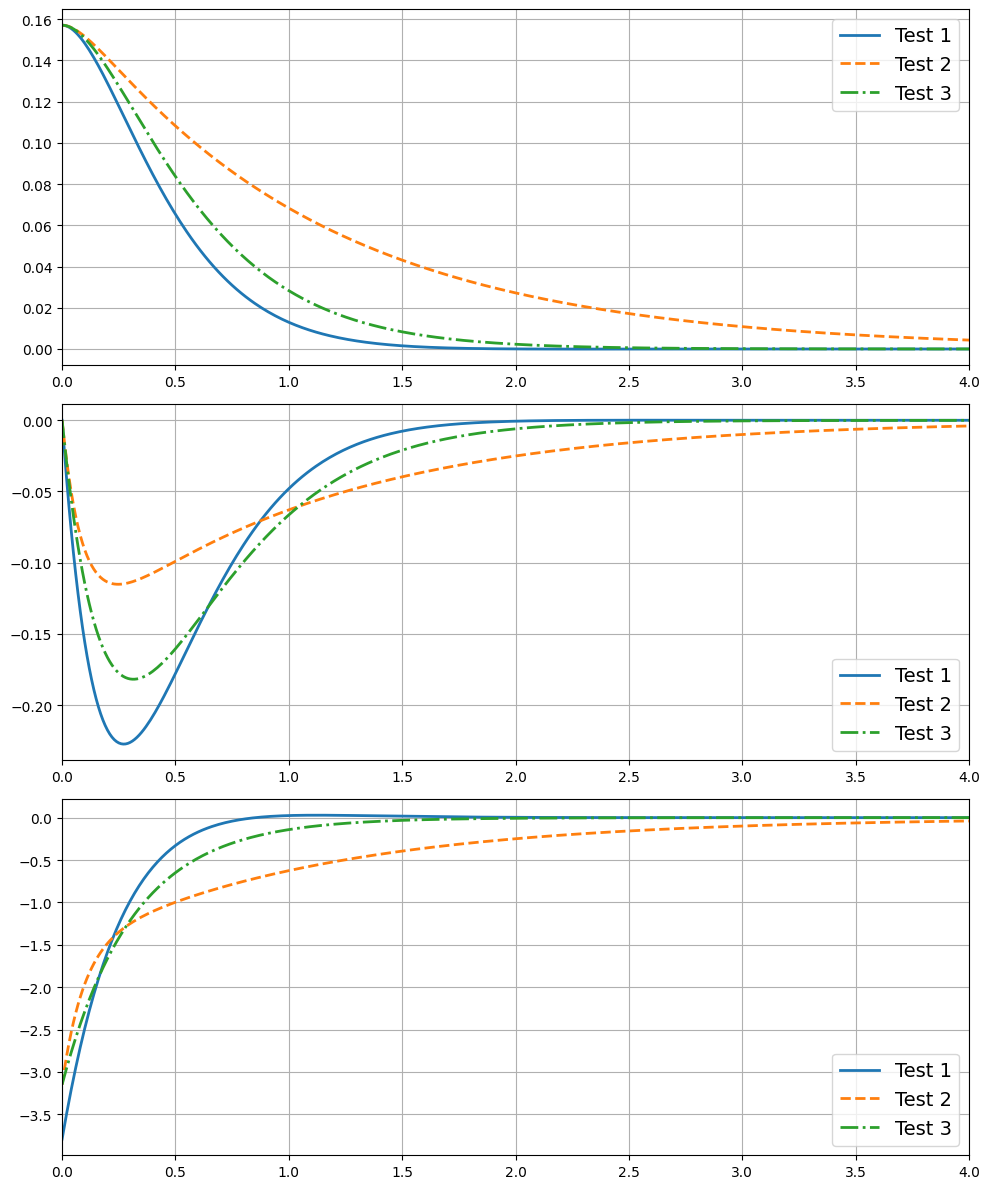

In [21]:
# Results visualization
plt.figure(figsize=(10, 12))

# Plot the response of the first state (angle)
plt.subplot(3, 1, 1)
plt.plot(t, x1[:, 0], linewidth=2)
plt.plot(t, x2[:, 0], '--', linewidth=2)
plt.plot(t, x3[:, 0], '-.', linewidth=2)
plt.legend(['Test 1', 'Test 2', 'Test 3'], fontsize=14)
plt.xlim([0, 4])
plt.grid(True)

# Plot the response of the second state (angular velocity)
plt.subplot(3, 1, 2)
plt.plot(t, x1[:, 1], linewidth=2)
plt.plot(t, x2[:, 1], '--', linewidth=2)
plt.plot(t, x3[:, 1], '-.', linewidth=2)
plt.legend(['Test 1', 'Test 2', 'Test 3'], fontsize=14)
plt.xlim([0, 4])
plt.grid(True)

# Plot the input (acceleration)
plt.subplot(3, 1, 3)
plt.plot(t, (-K1 @ x1.T).T, linewidth=2)
plt.plot(t, (-K2 @ x2.T).T, '--', linewidth=2)
plt.plot(t, (-K3 @ x3.T).T, '-.', linewidth=2)
plt.legend(['Test 1', 'Test 2', 'Test 3'], fontsize=14)
plt.xlim([0, 4])
plt.grid(True)

plt.tight_layout()
plt.show()

# 4.5 LQR_Test_tracking_E_offset_MSD
程序功能：弹簧质量阻尼系统非零参考点分析-引入控制目标误差

In [22]:
from scipy.signal import cont2discrete, lti

# 定义系统参数
m_sys = 1.     # 质量块质量
b_sys = 0.5    # 阻尼系数
k_sys = 1.     # 弹簧的弹性系数

# 系统定义
A = np.array([[0, 1], 
              [-k_sys/m_sys, -b_sys/m_sys]])
B = np.array([[0], 
              [1/m_sys]])
C = np.array([[1, 0]])  # Assuming we are interested in the position 'x'
D = np.array([[0]])

# 系统离散化
Ts = 0.1

sys_c = lti(A, B, C, D)
sys_d = sys_c.to_discrete(Ts)
A_d = sys_d.A
B_d = sys_d.B

n = A.shape[1]
p = B.shape[1]

# 系统权重设计
Q = np.eye(n)
S = np.eye(n)
R = np.array([[1.]])

# 系统参考值（目标值）
xd = np.array([[1.], 
               [0.]])
AD = np.eye(n)

In [23]:
# 系统初始化
x0 = np.array([[0.], [0.]])
x = x0
xa = np.vstack((x, xd))
xa.shape

(4, 1)

In [24]:
# 构建增广矩阵
Ca = np.hstack((np.eye(n), -np.eye(n)))
Aa = np.block([[A_d, np.zeros((n, n))], [np.zeros((n, n)), AD]])  # Aa = np.vstack((np.hstack((A_d, np.zeros((n, n)))), np.hstack((np.zeros((n, n)), AD))))
Ba = np.vstack((B_d, np.zeros((n, p))))
Sa = Ca.T @ S @ Ca
Qa = Ca.T @ Q @ Ca

In [25]:
# 计算负反馈增益
F = F1_LQR_Gain(Aa, Ba, Qa, R, Sa)
F

No. of Iteration is 69


array([[ 0.34918805,  0.89419051, -0.66874002, -0.00341632]])

In [26]:
# 仿真
k_steps = 100
x_history = np.zeros((n, k_steps + 1))
u_history = np.zeros((p, k_steps))
x_history[:, 0] = x.flatten()

for k in range(k_steps):
    u = -F @ xa
    x = A_d @ x + B_d @ u
    xa = np.vstack((x, xd))
    x_history[:, k + 1] = x.flatten()
    u_history[:, k] = u.flatten()

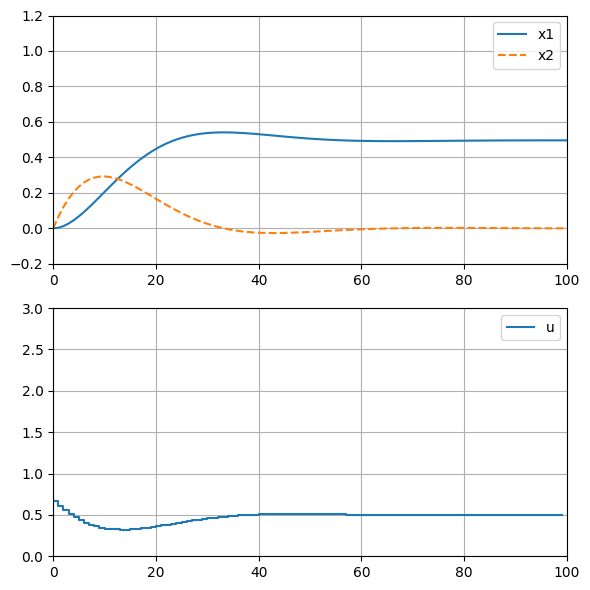

In [27]:
# Results visualization
plt.figure(figsize=(6, 6))

# State variables plot
plt.subplot(2, 1, 1)
plt.plot(x_history[0, :], label='x1')
plt.plot(x_history[1, :], '--', label='x2')
plt.grid(True)
plt.legend()
plt.xlim([0, k_steps])
plt.ylim([-0.2, 1.2])

# Input variables plot
plt.subplot(2, 1, 2)
plt.step(range(k_steps), u_history[0, :], where='post', label='u')
plt.grid(True)
plt.legend()
plt.xlim([0, k_steps])
plt.ylim([0, 3])

plt.tight_layout()
plt.show()

# 4.6 F2_InputAugmentMatrix_SS_U
稳态非零控制矩阵转化模块

In [28]:
def F2_InputAugmentMatrix_SS_U(A, B, Q, R, S, xd):
    n = A.shape[1]
    p = B.shape[1]

    Ca = np.block([np.eye(n), -np.eye(n)])
    Aa = np.block([
        [A, np.eye(n) - A],
        [np.zeros((n, n)), np.eye(n)]
    ])
    Ba = np.block([
        [B],
        [np.zeros((n, p))]
    ])
    Qa = Ca.T @ Q @ Ca

    Sa = Ca.T @ S @ Ca

    aa = (np.eye(n) - A) @ xd
    ud, _, _, _ = np.linalg.lstsq(B, (np.eye(n) - A) @ xd, rcond=None)  # ud = np.linalg.pinv(B) @ ((np.eye(n) - A) @ xd)

    return Aa, Ba, Qa, Sa, R, ud

# 4.7 LQR_Test_tracking_SS_U_MSD
程序功能：弹簧质量阻尼系统 - 稳态非零参考值控制

In [29]:
# 系统参数定义
m_sys = 1.    # 质量块质量
b_sys = 0.5   # 阻尼系数
k_sys = 1.    # 定义弹簧弹性系数

# 系统定义
A = np.array([[0., 1.], 
              [-k_sys/m_sys, -b_sys/m_sys]])
B = np.array([[0.], 
              [1/m_sys]])
C = np.array([[1., 0.]])  # Assuming we are interested in the position 'x'
D = np.array([[0.]])

# 系统离散化
Ts = 0.1
sys_c = lti(A, B, C, D)
sys_d = sys_c.to_discrete(Ts)
A = sys_d.A
B = sys_d.B

# 权重设计
Q = np.eye(2)
R = np.array([[0.1]])
S = np.eye(2)

xd = np.array([[1.], [0.]])  # 目标状态

x0 = np.array([[0.], [0.]])
x = x0
xa = np.vstack((x, xd))

In [30]:
Aa, Ba, Qa, Sa, R, ud = F2_InputAugmentMatrix_SS_U(A, B, Q, R, S, xd)  # 获取增广矩阵和稳态目标输入
F = F1_LQR_Gain(Aa, Ba, Qa, R, Sa)                                     # 计算负反馈增益
print("稳态输入为：", ud)

No. of Iteration is 36
稳态输入为： [[1.]]


In [31]:
# 仿真
k_steps = 100
x_history = np.zeros((2, k_steps + 1))
u_history = np.zeros((1, k_steps))
x_history[:, 0] = x.flatten()

for k in range(k_steps):
    u = -F @ xa + ud
    x = A @ x + B @ u
    xa = np.vstack((x, xd))
    x_history[:, k + 1] = x.flatten()
    u_history[:, k] = u.flatten()

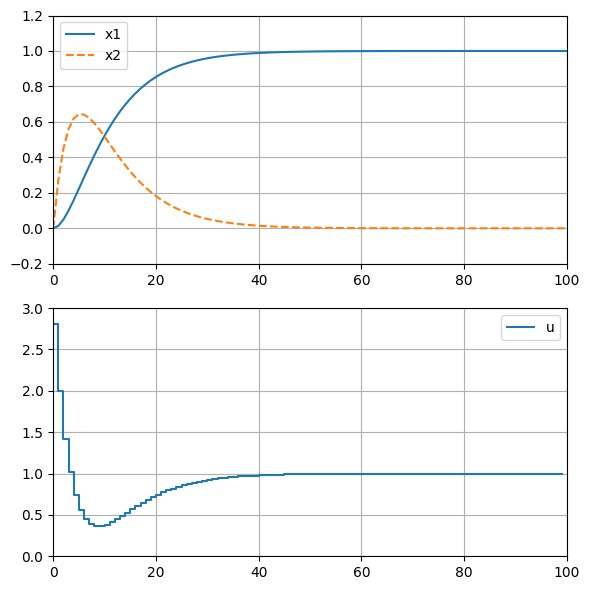

In [32]:
# Plot results
plt.figure(figsize=(6, 6))

# Plot state variables
plt.subplot(2, 1, 1)
plt.plot(x_history[0, :], label='x1')
plt.plot(x_history[1, :], '--', label='x2')
plt.grid(True)
plt.legend()
plt.xlim([0, k_steps])
plt.ylim([-0.2, 1.2])

# Plot input variable
plt.subplot(2, 1, 2)
plt.step(range(k_steps), u_history[0, :], where='post', label='u')
plt.grid(True)
plt.legend()
plt.xlim([0, k_steps])
plt.ylim([0, 3])

plt.tight_layout()
plt.show()

# 4.8 F3_InputAugmentMatrix_Delta_U
输入增量控制矩阵转换模块

In [33]:
import numpy as np

def F3_InputAugmentMatrix_Delta_U(A, B, Q, R, S, AD):
    n = A.shape[1]
    p = B.shape[1]
    Ca = np.block([np.eye(n), -np.eye(n), np.zeros((n, p))])
    Aa = np.block([
        [A, np.zeros((n, n)), B],
        [np.zeros((n, n)), AD, np.zeros((n, p))],
        [np.zeros((p, n)), np.zeros((p, n)), np.eye(p)]
    ])
    Ba = np.block([
        [B],
        [np.zeros((n, p))],
        [np.eye(p)]
    ])
    Qa = Ca.T @ Q @ Ca
    Sa = Ca.T @ S @ Ca

    return Aa, Ba, Qa, Sa, R

# 4.9 LQR_Test_tracking_Delta_U_MSD
程序功能：弹簧质量阻尼系统 - 输入增量控制

In [34]:
# 定义系统参数
m_sys = 1.   # 质量块质量
b_sys = 0.5  # 阻尼系数
k_sys = 1.   # 弹簧弹性系数

# 系统定义
A = np.array([[0., 1.], [-k_sys / m_sys, -b_sys / m_sys]])
n = A.shape[1]  # 计算A矩阵维度
B = np.array([[0.], [1. / m_sys]])
p = B.shape[1]  # 计算输入矩阵维度

Ts = 0.1  # 离散时间步长
sys_d = cont2discrete((A, B, [[0]], [[0]]), Ts)
A = sys_d[0]
B = sys_d[1]

# 权重设计
Q = np.array([[1., 0.], 
              [0., 1.]])
S = np.array([[1., 0.], 
              [0., 1.]])
R = np.array([[0.1]])

In [35]:
# 系统参考值
xd = np.array([[1.], 
               [0.]])
AD = np.eye(n)  # 构建目标转移矩阵

# 系统初始化
x0 = np.array([[0.], 
               [0.]])  # 初始化系统状态
x = x0
u0 = np.array([[0.]])  # 系统输入初始化
u = u0
xa = np.concatenate((x, xd, u))  # 构建初始化增广状态矩阵
xa

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [36]:
[Aa, Ba, Qa, Sa, R] = F3_InputAugmentMatrix_Delta_U(A,B,Q,R,S,AD)
F = F1_LQR_Gain(Aa, Ba, Qa, R, Sa)

No. of Iteration is 64


In [37]:
# 仿真
k_steps = 100
x_history = np.zeros((n, k_steps + 1))
u_history = np.zeros((p, k_steps))
x_history[:, 0] = x.flatten()

# 仿真开始
for k in range(k_steps):
    Delta_u = -F @ xa
    u = Delta_u + u
    x = A @ x + B * u
    xd = AD @ xd
    xa = np.concatenate((x, xd, u))
    x_history[:, k+1] = x.flatten()  # 将x保存到历史记录
    u_history[:, k] = u  # 将u保存到历史记录

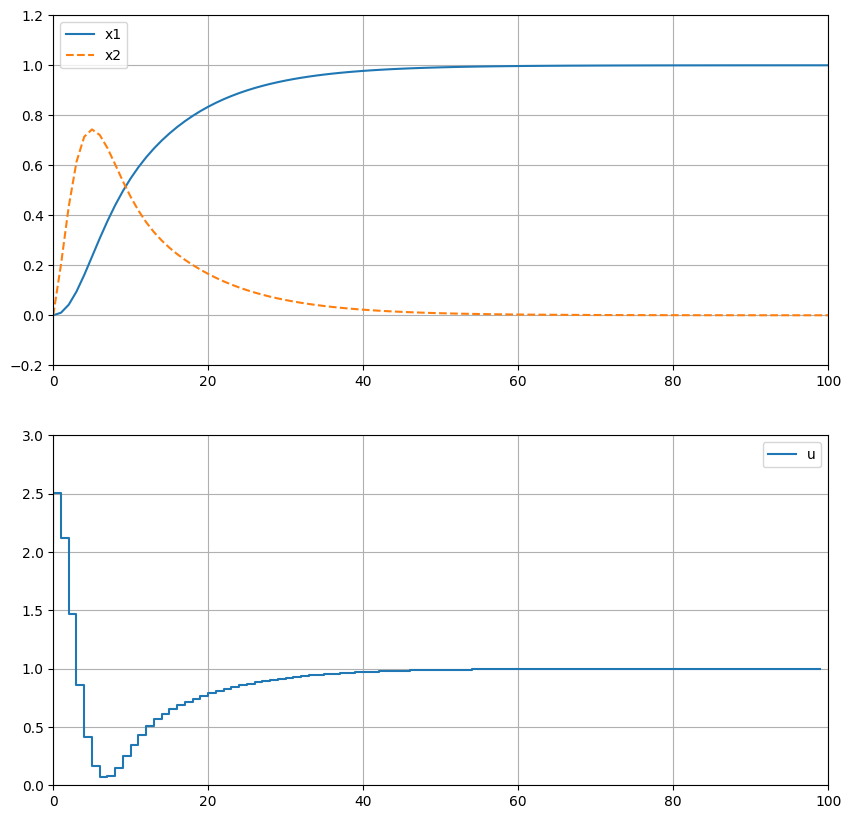

In [38]:
# 结果可视化
plt.figure(figsize=(10, 10))
# 状态变量结果图
plt.subplot(2, 1, 1)
plt.plot(x_history[0, :], label="x1")
plt.plot(x_history[1, :], '--', label="x2")
plt.grid(True)
plt.legend()
plt.xlim([0, k_steps])
plt.ylim([-0.2, 1.2])

# 系统输入结果图
plt.subplot(2, 1, 2)
plt.step(range(k_steps), u_history[0, :], label="u")
plt.legend()
plt.grid(True)
plt.xlim([0, k_steps])
plt.ylim([0, 3])

plt.show()

# 4.10 LQR_Test_tracking_Delta_U_AD_MSD
程序功能：弹簧质量阻尼系统 -输入增量非常数目标

In [39]:
# 系统参数定义
m_sys = 1.0  # 质量块质量
b_sys = 0.5  # 阻尼系数
k_sys = 1.0  # 弹簧弹性系数

# 系统矩阵构建
A = np.array([[0., 1.], 
              [-k_sys / m_sys, -b_sys / m_sys]])
n = A.shape[1]  # A矩阵维度
B = np.array([[0.], 
              [1. / m_sys]])
p = B.shape[1]  # B矩阵维度

# 系统离散化
Ts = 0.1  # 离散时间步长
sys_d = cont2discrete((A, B, np.zeros((n, 1)), np.zeros((1, 1))), Ts, method='zoh')
A = sys_d[0]
B = sys_d[1]

# 权重矩阵设计
Q = np.array([[1., 0.], 
              [0., 1.]])
S = np.array([[1., 0.], 
              [0., 1.]])
R = np.array([[1.]])

In [40]:
# 系统参考值
xd = np.array([[0.], [0.2]])

# 目标转移矩阵
AD = cont2discrete((np.array([[0., 1.], 
                              [0., 0.]]), 
                    np.array([[0.], 
                              [0.]]), 
                    np.zeros((2, 1)), 
                    np.zeros((1, 1))), 
                   Ts, method='zoh')[0]


In [41]:
[Aa, Ba, Qa, Sa, R] = F3_InputAugmentMatrix_Delta_U(A, B, Q, R, S, AD)
F = F1_LQR_Gain(Aa, Ba, Qa, R, Sa)

No. of Iteration is 34


In [42]:
# 系统初始化
x0 = np.array([[0.], 
               [0.]])
x = x0
u0 = np.array([[0.]])
u = u0
xa = np.concatenate((x, xd, u))  # 增广状态矩阵初始化

# 仿真
k_steps = 200
x_history = np.zeros((n, k_steps))
u_history = np.zeros((p, k_steps))
xd_history = np.zeros((n, k_steps))
x_history[:, 0] = x.flatten()
xd_history[:, 0] = xd.flatten()

# 仿真开始
for k in range(1, k_steps):
    if k == 50:
        xd = np.array([[xd[0, 0]], [-0.2]])
    elif k == 100:
        xd = np.array([[xd[0, 0]], [0.2]])
    elif k == 150:
        xd = np.array([[xd[0, 0]], [-0.2]])
    elif k == 200:
        xd = np.array([[xd[0, 0]], [0.2]])

    # 输入增量计算
    Delta_u = -F @ xa
    u = Delta_u + u

    # 系统响应计算
    x = A @ x + B * u

    # 更新增广状态
    xd = AD @ xd
    xa = np.concatenate((x, xd, u))

    # 保存历史数据
    x_history[:, k] = x.flatten()
    u_history[:, k - 1] = u
    xd_history[:, k] = xd.flatten()

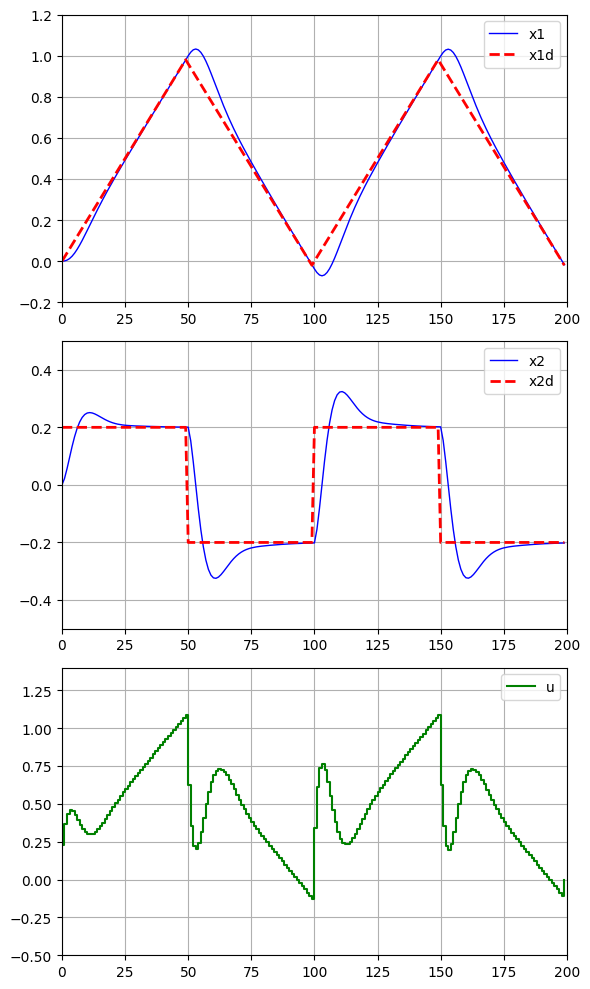

In [43]:
# 结果可视化
plt.figure(figsize=(6, 10))

# 系统状态x1结果图
plt.subplot(3, 1, 1)
plt.plot(x_history[0, :], 'b', label="x1", linewidth=1)
plt.plot(xd_history[0, :], 'r--', label="x1d", linewidth=2)
plt.grid(True)
plt.legend(loc='upper right')
plt.xlim([0, k_steps])
plt.ylim([-0.2, 1.2])

# 系统状态x2结果图
plt.subplot(3, 1, 2)
plt.plot(x_history[1, :], 'b', label="x2", linewidth=1)
plt.plot(xd_history[1, :], 'r--', label="x2d", linewidth=2)
plt.grid(True)
plt.legend(loc='upper right')
plt.xlim([0, k_steps])
plt.ylim([-0.5, 0.5])

# 系统输入结果图
plt.subplot(3, 1, 3)
plt.step(range(k_steps), u_history[0, :], 'g', label="u", where='post')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim([0, k_steps])
plt.ylim([-0.5, 1.4])

plt.tight_layout()  # 自动调整子图间距
plt.show()  # 显示绘图窗口

# 4.11 LQR_UAV_tracking_SS_U
程序功能：无人机高度追踪控制

In [44]:
# 系统参数定义
m = 1.0  # 无人机质量
g = 10.0  # 重力加速度常数

# 系统矩阵构建
A = np.array([[0., 1., 0.],
              [0., 0., 1.],
              [0., 0., 0.]])
n = A.shape[0]  # A矩阵维度
B = np.array([[0.],
              [1. / m],
              [0.]])
p = B.shape[1]  # B矩阵维度

# 系统离散化
Ts = 0.1  # 离散时间步长
sys_d = cont2discrete((A, B, np.zeros((n, 1)), np.zeros((1, 1))), Ts)
A = sys_d[0]
B = sys_d[1]

# 权重矩阵设计
Q = np.array([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])
S = np.array([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])
R = np.array([[1.]])

In [45]:
# 系统参考值
xd = np.array([[10.],
               [0.],
               [-10.]])
AD = np.eye(n)

In [46]:
# 系统初始化
x0 = np.array([[0.],
               [0.],
               [-10.]])
x = x0
xa = np.concatenate((x, xd))
u0 = 0.0
u = u0

In [47]:
Aa, Ba, Qa, Sa, R, ud = F2_InputAugmentMatrix_SS_U(A, B, Q, R, S, xd)
F = F1_LQR_Gain(Aa, Ba, Qa, R, Sa)

No. of Iteration is 68


In [48]:
# 仿真
k_steps = 100
x_history = np.zeros((n, k_steps + 1))
u_history = np.zeros((p, k_steps))
x_history[:, 0] = x.flatten()

for k in range(k_steps):
    u = -F @ xa + ud
    x = A @ x + B * u
    xa = np.concatenate((x, xd))
    x_history[:, k + 1] = x.flatten()
    u_history[:, k] = u

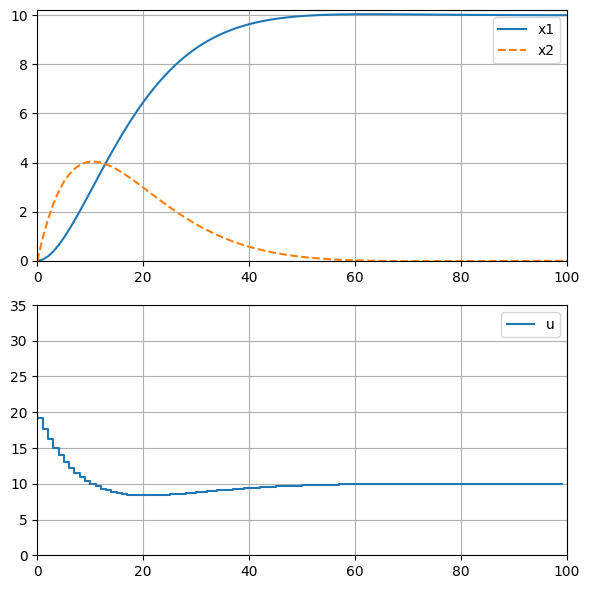

In [49]:
# 结果可视化
plt.figure(figsize=(6, 6))

# 状态变量结果图
plt.subplot(2, 1, 1)
plt.plot(x_history[0, :], label="x1")
plt.plot(x_history[1, :], '--', label="x2")
plt.grid(True)
plt.legend(loc='upper right')
plt.xlim([0, k_steps])
plt.ylim([0, 10.2])

# 系统输入结果图
plt.subplot(2, 1, 2)
plt.step(range(k_steps), u_history[0, :], where='post', label="u")
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim([0, k_steps])
plt.ylim([0, 35])

plt.tight_layout()  # 自动调整子图间距
plt.show()  # 显示绘图窗口

# 4.12 LQR_UAV_tracking_SS_U_InputConstraints
程序功能：无人机高度追踪控制-包含饱和函数

In [50]:
# 系统参数定义
m = 1.0  # 无人机质量
g = 10.0  # 重力加速度常数

# 系统矩阵构建
A = np.array([[0., 1., 0.],
              [0., 0., 1.],
              [0., 0., 0.]])
n = A.shape[0]  # A矩阵维度
B = np.array([[0.],
              [1. / m],
              [0.]])
p = B.shape[1]  # B矩阵维度

# 系统离散化
Ts = 0.1  # 离散时间步长
sys_d = cont2discrete((A, B, np.zeros((n, 1)), np.zeros((1, 1))), Ts)
A = sys_d[0]
B = sys_d[1]

# 权重矩阵设计
Q = np.array([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])
S = np.array([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])
R = np.array([[0.1]])

In [51]:
Aa, Ba, Qa, Sa, R, ud = F2_InputAugmentMatrix_SS_U(A, B, Q, R, S, xd)
F = F1_LQR_Gain(Aa, Ba, Qa, R, Sa)

No. of Iteration is 39


In [52]:
# 系统参考值
xd = np.array([[10.],
               [0.],
               [-10.]])
AD = np.eye(n)

# 系统初始化
x0 = np.array([[0.],
               [0.],
               [-10.]])
x = x0
xa = np.concatenate((x, xd))
u0 = np.array([[0.0]])
u = u0

# 系统输入限制
u_max = 12.
u_min = 7.

In [53]:
k_steps = 100
x_history = np.zeros((n, k_steps + 1))
u_history = np.zeros((p, k_steps))
x_history[:, 0] = x.flatten()

for k in range(k_steps):
    u = -F @ xa + ud
    u = np.clip(u, u_min, u_max)  # 施加系统输入限制（基于饱和函数的硬限制）
    x = A @ x + B * u
    xa = np.concatenate((x, xd))
    x_history[:, k + 1] = x.flatten()
    u_history[:, k] = u

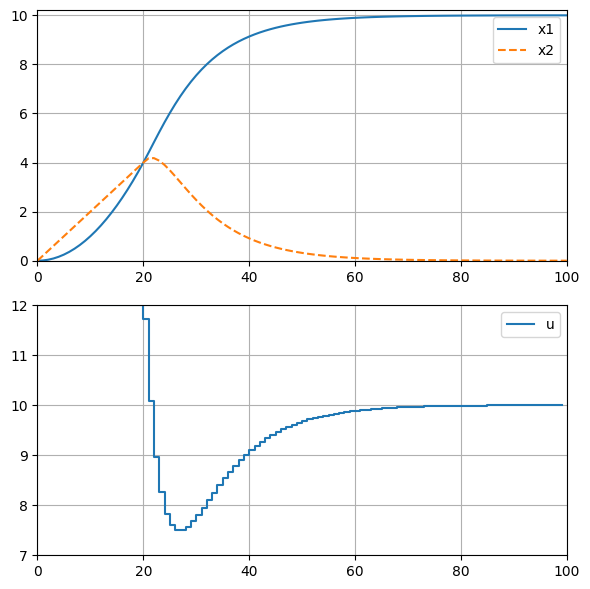

In [54]:
# 结果可视化
plt.figure(figsize=(6, 6))

# 状态变量结果图
plt.subplot(2, 1, 1)
plt.plot(x_history[0, :], label="x1")
plt.plot(x_history[1, :], '--', label="x2")
plt.grid(True)
plt.legend(loc='upper right')
plt.xlim([0, k_steps])
plt.ylim([0, 10.2])

# 系统输入结果图
plt.subplot(2, 1, 2)
plt.step(range(k_steps), u_history[0, :], where='post', label="u")
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim([0, k_steps])
plt.ylim([u_min, u_max])

plt.tight_layout()  # 自动调整子图间距
plt.show()  # 显示绘图窗口